# Example 1: Purchase data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('D9data3.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Decision Tree

In [12]:
#Model Building
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
#Predict
print(classifier.predict(sc.transform([[40, 95000]])))

[1]


In [14]:
y_pred=classifier.predict(X_test)

In [15]:
print((np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [16]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

In [17]:
accuracy_score(y_test,y_pred)

0.91

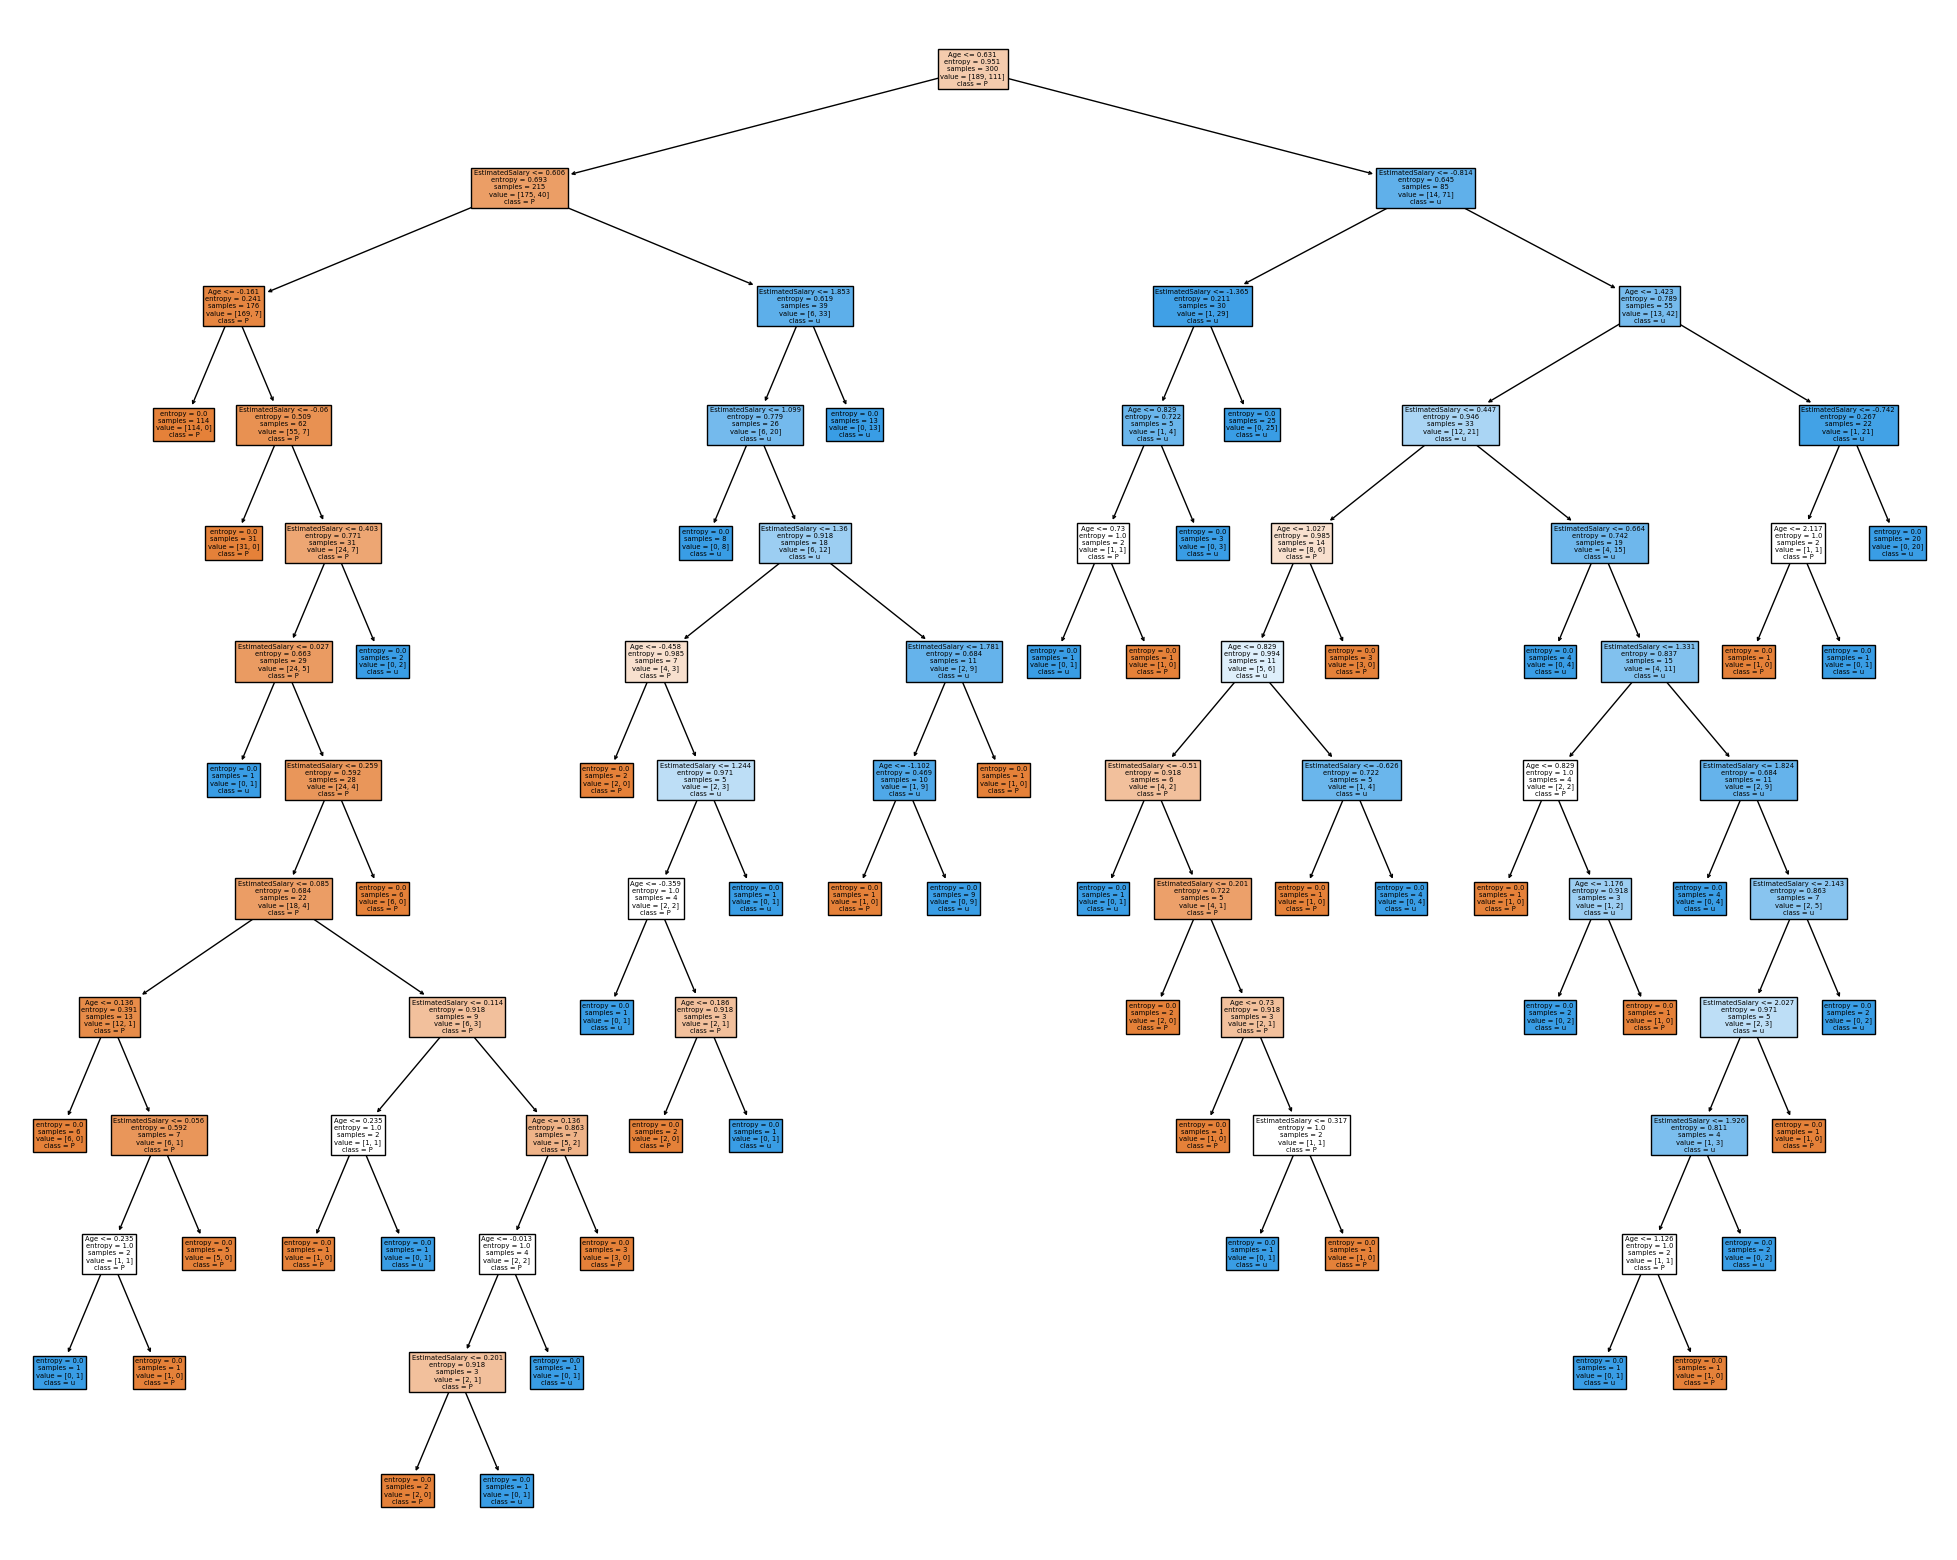

In [19]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=dataset.columns,  
                   class_names="Purchased",
                   filled=True)

# Random Forest

In [20]:
# Fitting the classifier into the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [21]:
# Predicting the test set results

Y_Pred = classifier.predict(X_test)

In [22]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_Pred)
cm

array([[64,  4],
       [ 4, 28]], dtype=int64)

In [23]:
accuracy_score(y_test,y_pred)

0.91

# Example 2: Iris dataset

In [25]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [29]:
# Prepare the data data
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [30]:
X = iris.data
y = iris.target

In [31]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Decision Tree Model

In [34]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [35]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [36]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

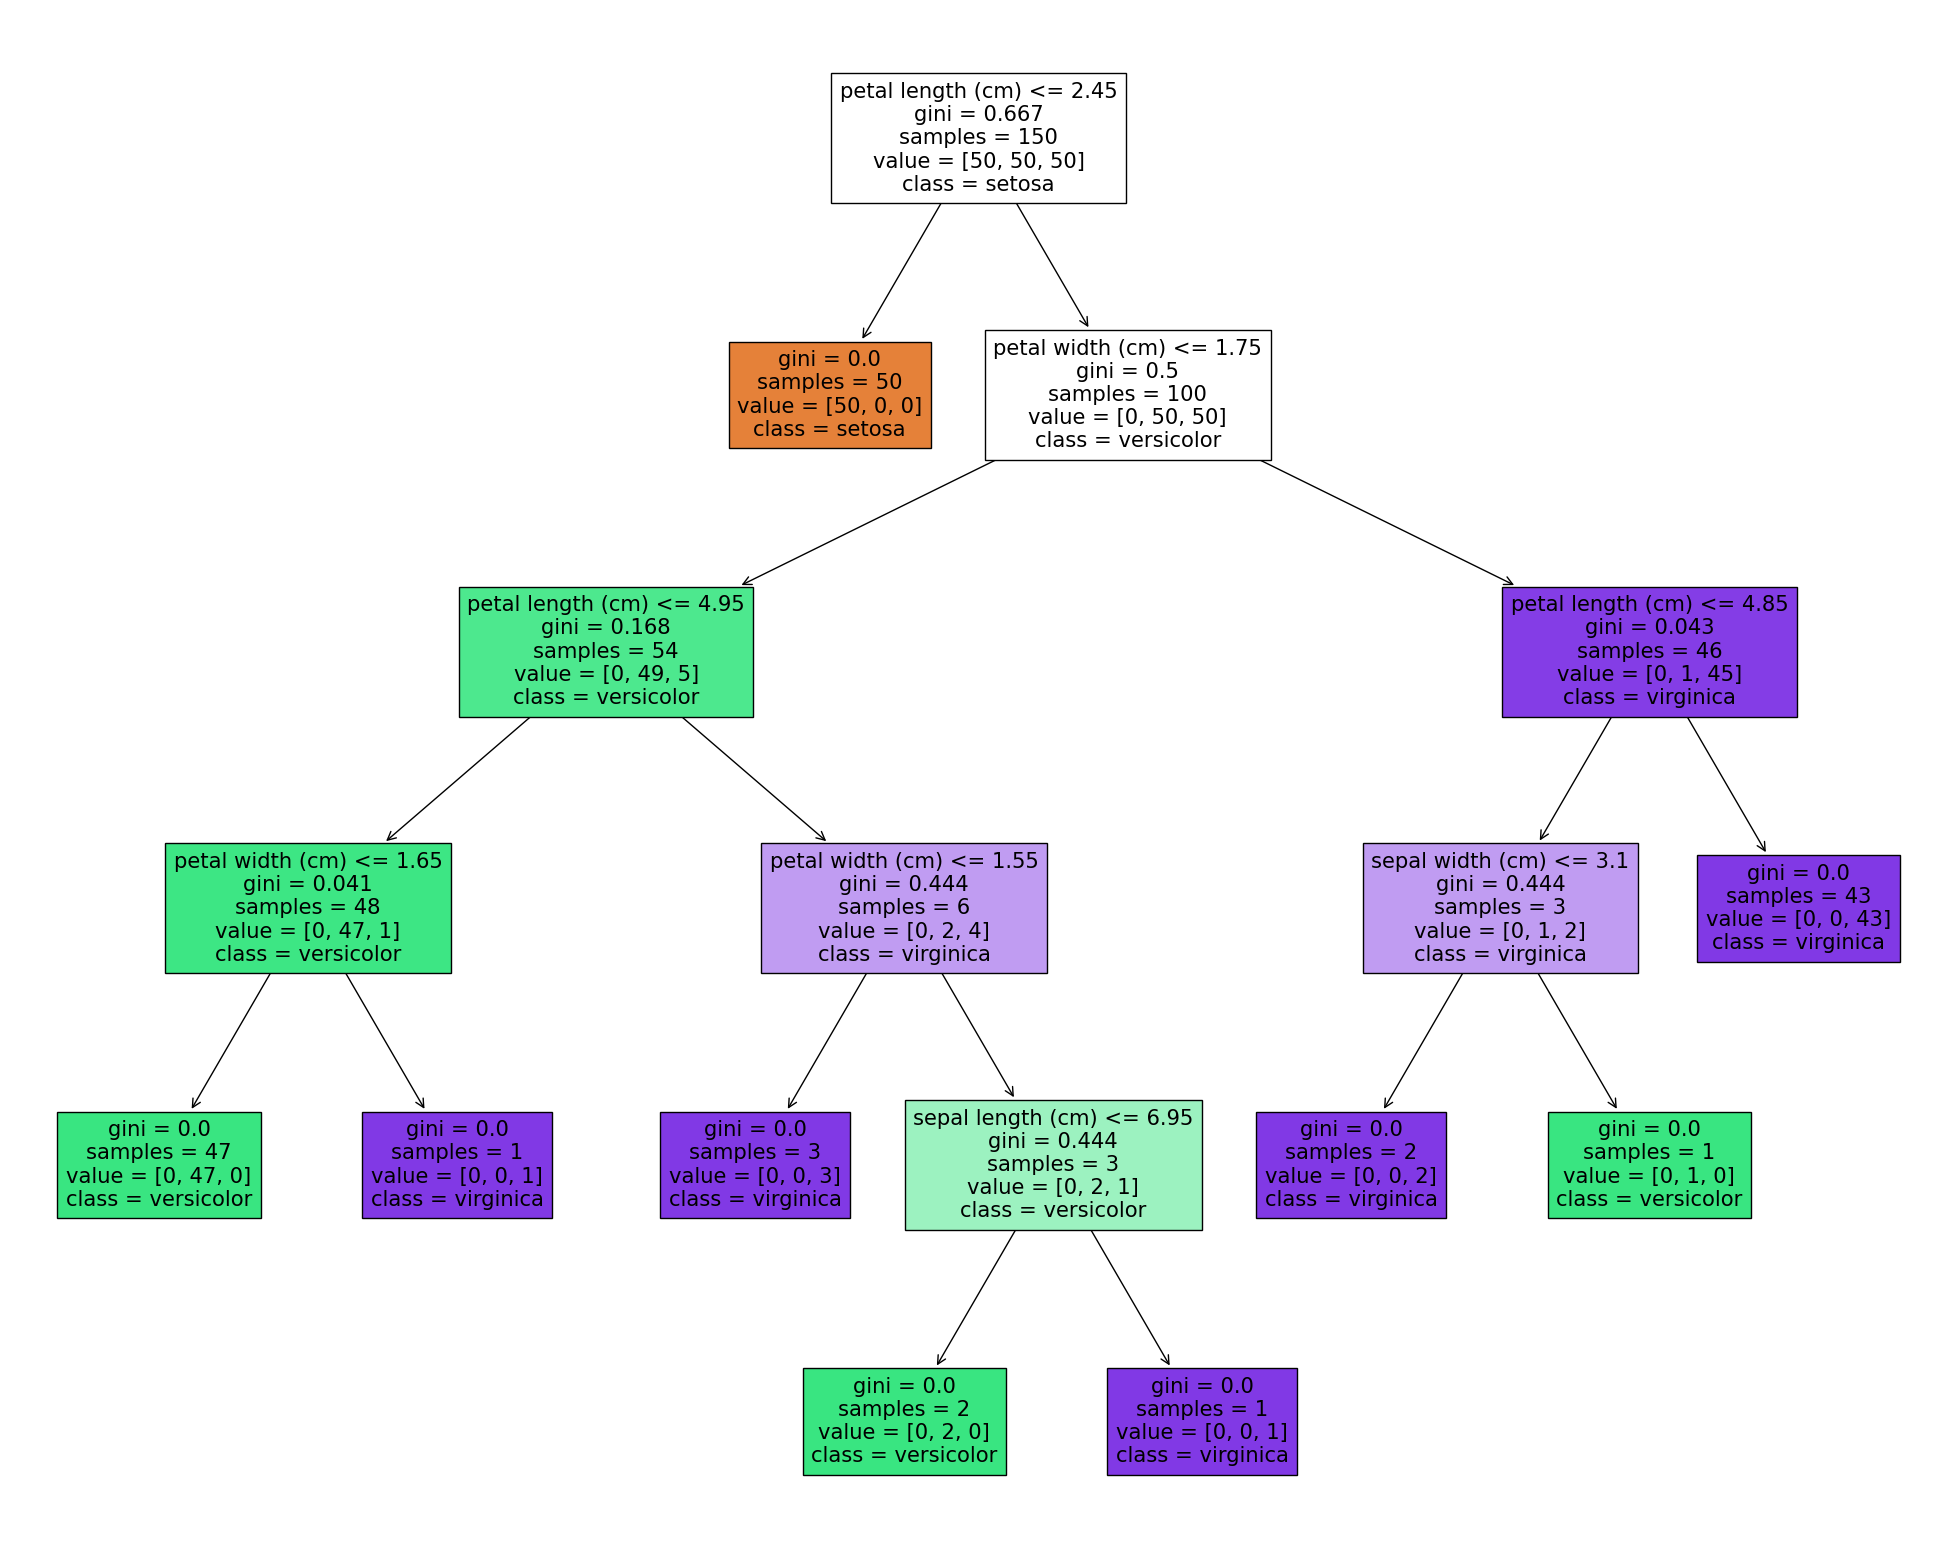

In [37]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

# Visualizing the Decision Tree in Regression Task

# Example 3: Using boston dataset

In [52]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
# Prepare the data data
boston = datasets.load_boston()
X = boston.data
y = boston.target

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [53]:
# Fit the regressor, set max_depth = 3
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- value: [45.58]
|   |   |--- feature_7 >  1.38
|   |   |   |--- value: [22.91]
|   |--- feature_12 >  14.40
|   |   |--- feature_0 <= 6.99
|   |   |   |--- value: [17.14]
|   |   |--- feature_0 >  6.99
|   |   |   |--- value: [11.98]
|--- feature_5 >  6.94
|   |--- feature_5 <= 7.44
|   |   |--- feature_4 <= 0.66
|   |   |   |--- value: [33.35]
|   |   |--- feature_4 >  0.66
|   |   |   |--- value: [14.40]
|   |--- feature_5 >  7.44
|   |   |--- feature_10 <= 19.65
|   |   |   |--- value: [45.90]
|   |   |--- feature_10 >  19.65
|   |   |   |--- value: [21.90]



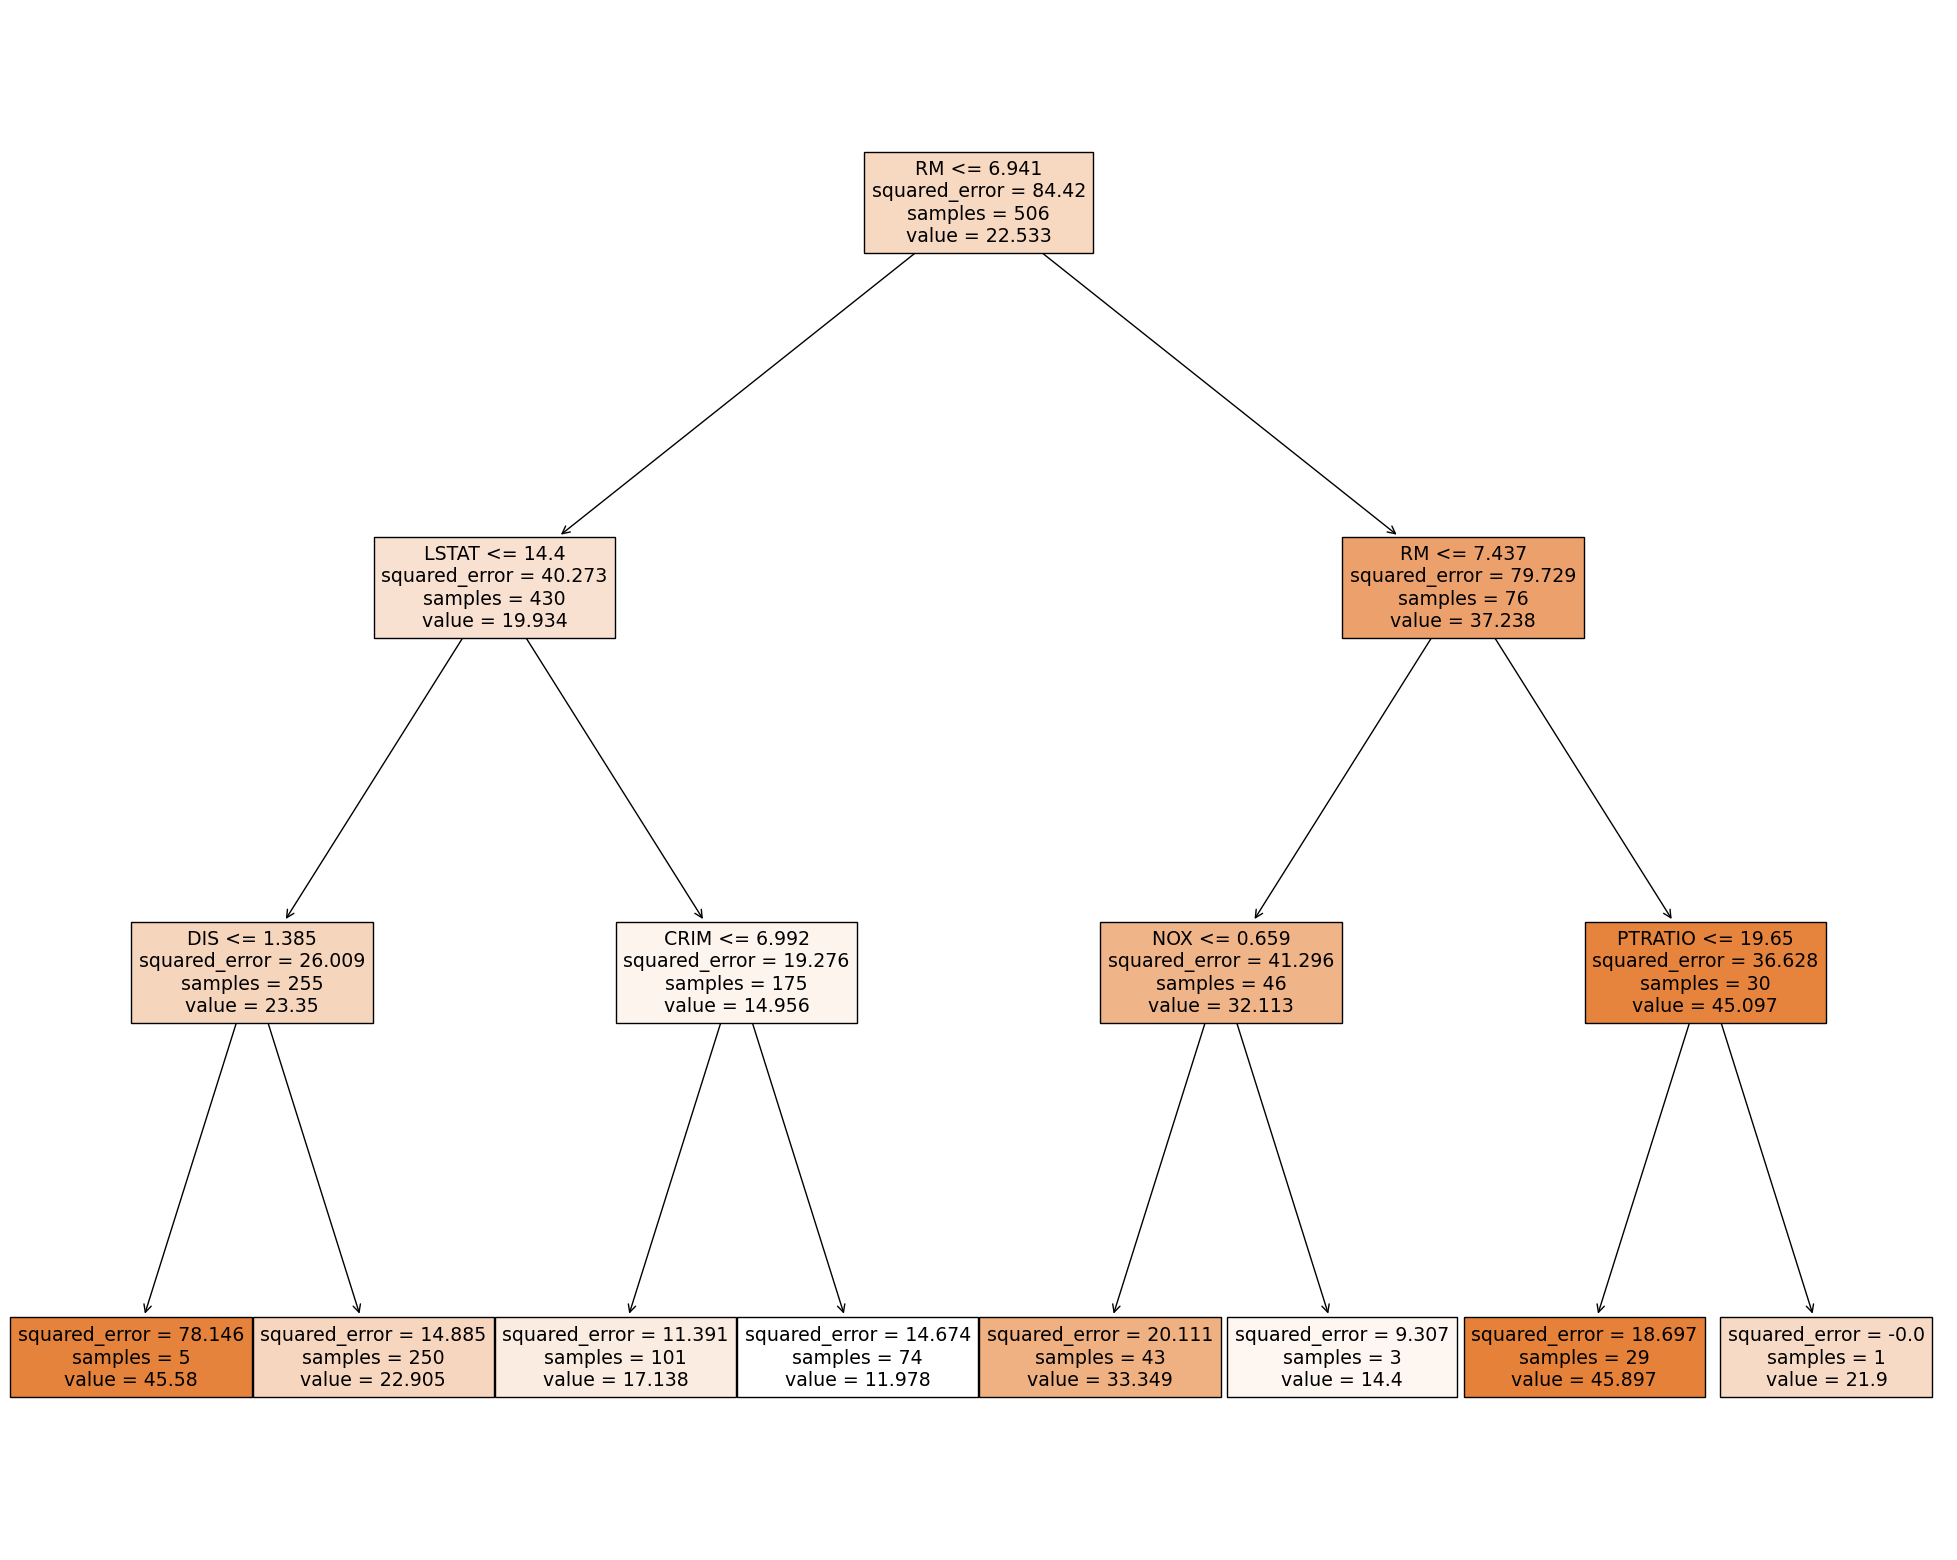

In [54]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=boston.feature_names, filled=True)

# Example 4: weather forecast

In [82]:
# Importing the necessary module!

import numpy as np
import pandas as pd

In [83]:
# Importing data

dataset = pd.read_csv("D:/Test/playgolf_data.csv")
dataset

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [84]:
dataset.dtypes

Outlook        object
Temperature    object
Humidity       object
Wind           object
PlayGolf       object
dtype: object

In [85]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   PlayGolf     14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [86]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([('trf',OneHotEncoder(sparse=False,drop='first'),['Outlook','Temperature','Humidity','Wind','PlayGolf'])]
,remainder='passthrough')

In [89]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Outlook', 'Temperature', 'Humidity', 'Wind',
                                  'PlayGolf'])])

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [91]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [92]:
pipe.fit(X_train,y_train)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [ ]:
y_pred = pipe.predict(X_test)

In [61]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder()
df = pd.DataFrame(encode.fit_transform([[0,1,2,3,4]]).toarray())

In [63]:
df.head()

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0


In [65]:
# Converting categorical variables into dummies/indicator variables

df_getdummy=pd.get_dummies(data=dataset, columns=['Temperature', 'Humidity', 'Outlook', 'Wind'])
df_getdummy

,PlayGolf,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Wind_Strong,Wind_Weak
0,No,0,1,0,1,0,0,0,1,0,1
1,No,0,1,0,1,0,0,0,1,1,0
2,Yes,0,1,0,1,0,1,0,0,0,1
3,Yes,0,0,1,1,0,0,1,0,0,1
4,Yes,1,0,0,0,1,0,1,0,0,1
5,No,1,0,0,0,1,0,1,0,1,0
6,Yes,1,0,0,0,1,1,0,0,1,0
7,No,0,0,1,1,0,0,0,1,0,1
8,Yes,1,0,0,0,1,0,0,1,0,1
9,Yes,0,0,1,0,1,0,1,0,0,1


In [66]:
#alternate method
# Import preprocessing from sklearn

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [68]:
# view columns using df.columns

dataset.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayGolf'], dtype='object')

In [69]:
# Create a LabelEncoder object and fit it to each feature in data

# encode labels with value between 0 and n_classes-1

le = preprocessing.LabelEncoder()

In [71]:
# Fit and Transform 
# use df.apply() to apply le.fit_transform to all columns

df = dataset.astype(str).apply(le.fit_transform)
df.head()

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
